In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Exercise: Exploration of the Iris Dataset

- Read, inspect and clean the dataset

    - Using the data cleaning approaches you already know
    
## Question: Can we predict classes from sizes?

In [3]:
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "iris_class"]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(f"There are {iris_data.shape[0]} rows and {iris_data.shape[1]} columns in this dataset")

There are 150 rows and 5 columns in this dataset


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- There are no missing values in this dataset.

- There are four columns of numerical type.

- There is one column of categorical type.

In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data[iris_data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,iris_class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


- There are 3 duplicates, therefore we must check whether each species dataset is balanced in no's or no.

In [8]:
iris_data['iris_class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris_class, dtype: int64

- We shouldn't delete the entries as it might imbalance the dataset and make it less useful for valuable insight.

### Visualizations

Uni-variate Analysis - comparison between various species based on sepal length and width

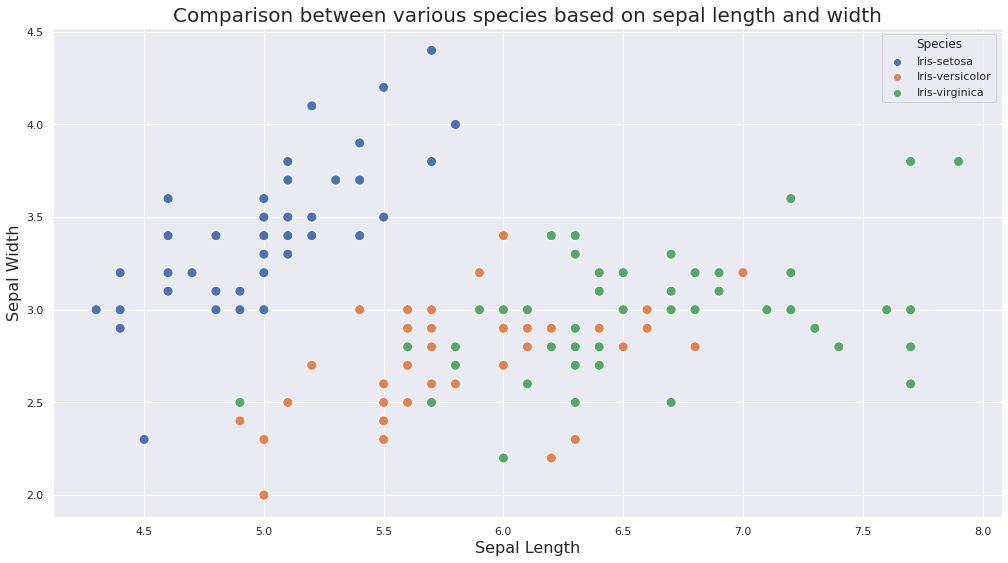

In [9]:
plt.figure(figsize = (17, 9))
sns.scatterplot(iris_data["sepal_length"], iris_data["sepal_width"], hue = iris_data["iris_class"], s = 100)

plt.xlabel("Sepal Length", fontsize = 16)
plt.ylabel("Sepal Width", fontsize = 16)
plt.title("Comparison between various species based on sepal length and width", fontsize = 20)
plt.legend(title = "Species")

plt.show()

#### Insights:

- Setosa species has smaller sepal length but larger width.

- Versicolor species is more or less in the middle of length and width.

- Virginica species has larger sepal length, but smaller width.

#### Comparison between various species based on petal length and width

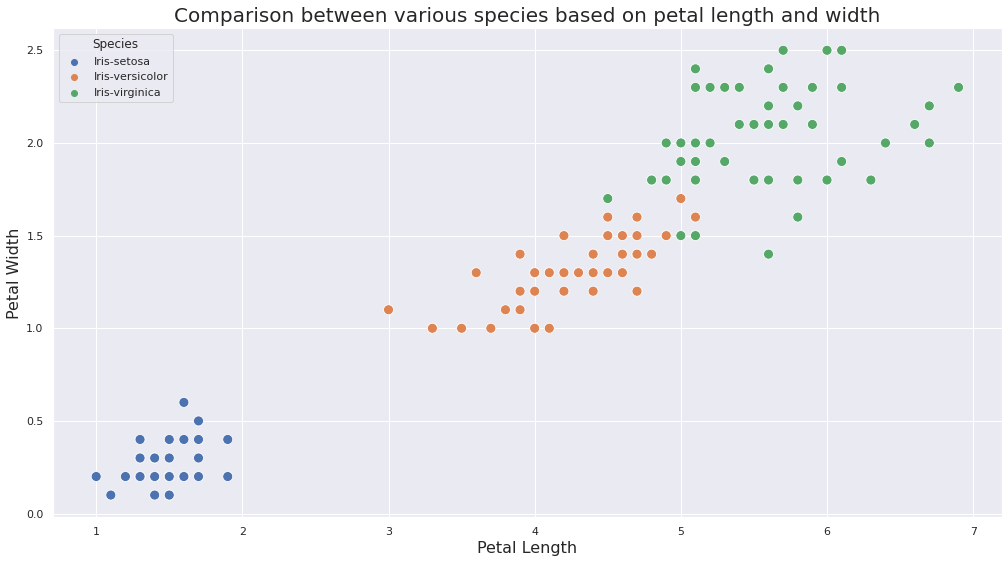

In [10]:
plt.figure(figsize = (17, 9))
sns.scatterplot(iris_data["petal_length"], iris_data["petal_width"], hue = iris_data["iris_class"], s = 100)

plt.xlabel("Petal Length", fontsize = 16)
plt.ylabel("Petal Width", fontsize = 16)
plt.title("Comparison between various species based on petal length and width", fontsize = 20)
plt.legend(title = "Species")

plt.show()

#### Insights:

- Setosa has small petal width and length.

- Versicolor has very balanced average of petal width and length.

- Virginica has the largest petal width and length.

#### Bi-variate Analysis 

- statistical analysis when two variables are observed against each other. One of the variables will be dependent and the other is independent. The variables are denoted by X and Y. The changes are analyzed between the two variables to understand to what extent the change has occurred.

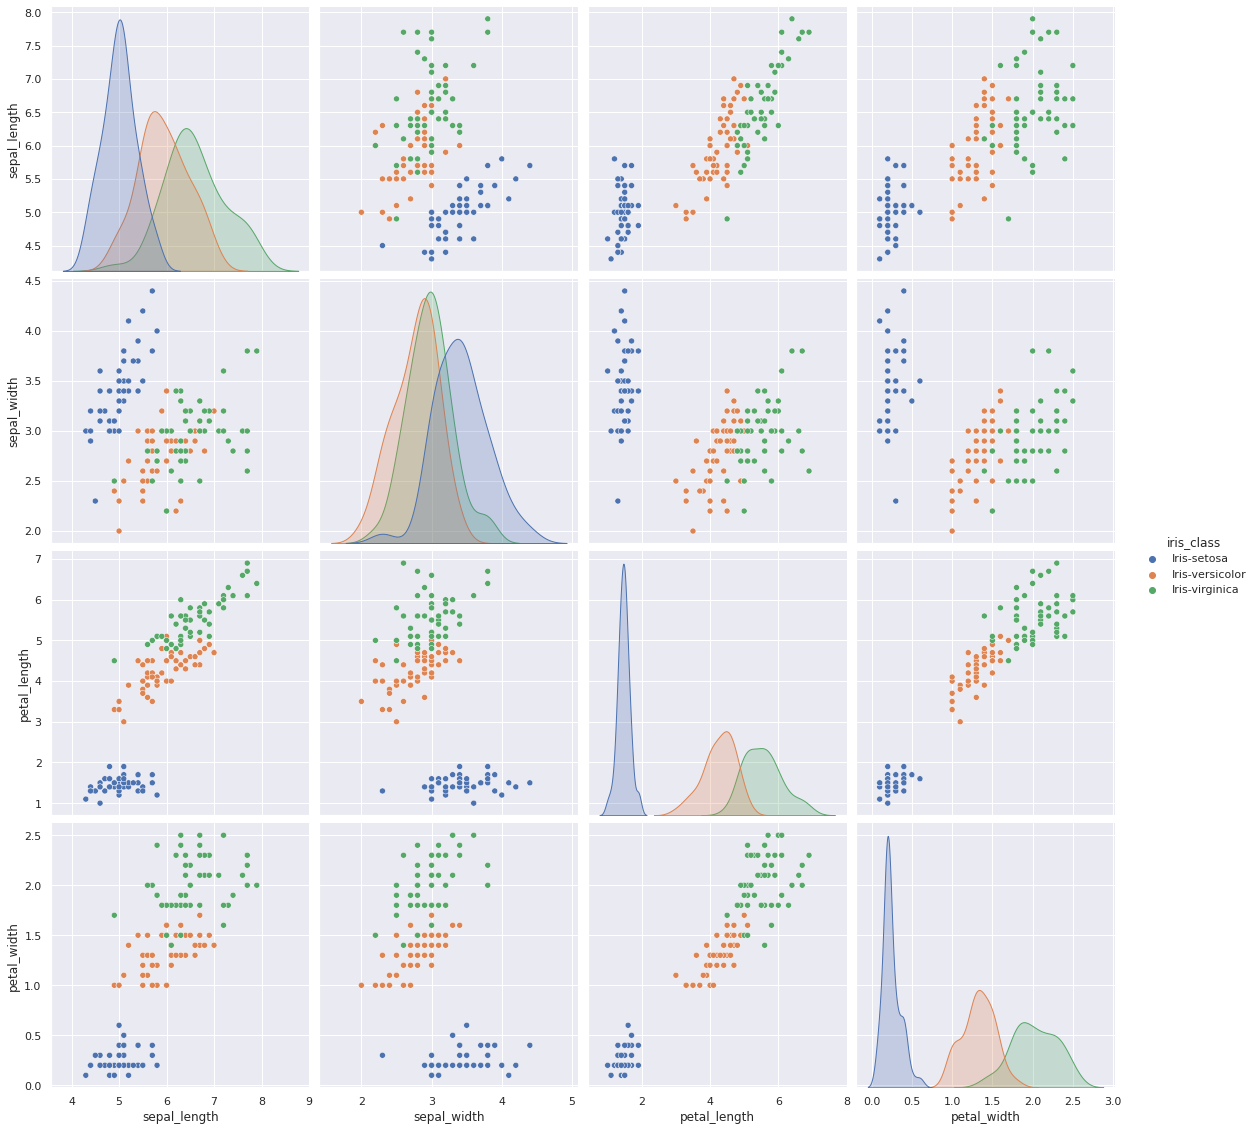

In [11]:
sns.pairplot(iris_data, hue = "iris_class", height = 4)

plt.show()

#### Insights:

We can confidently say that:

1. Setosa has the highest sepal length, but also the lowest sepal width. Therefore we can recognize it by the longest and the thinnest sepal.

2. Setosa has the smallest and the narrowest petals, this is another sign by which we can recognize it.

3. Versicolor has large petal length and width and also large sepal length and width.

4. Virginica has both high petal length and width.

5. Virginica has small width but large sepal length.

#### Checking correlation

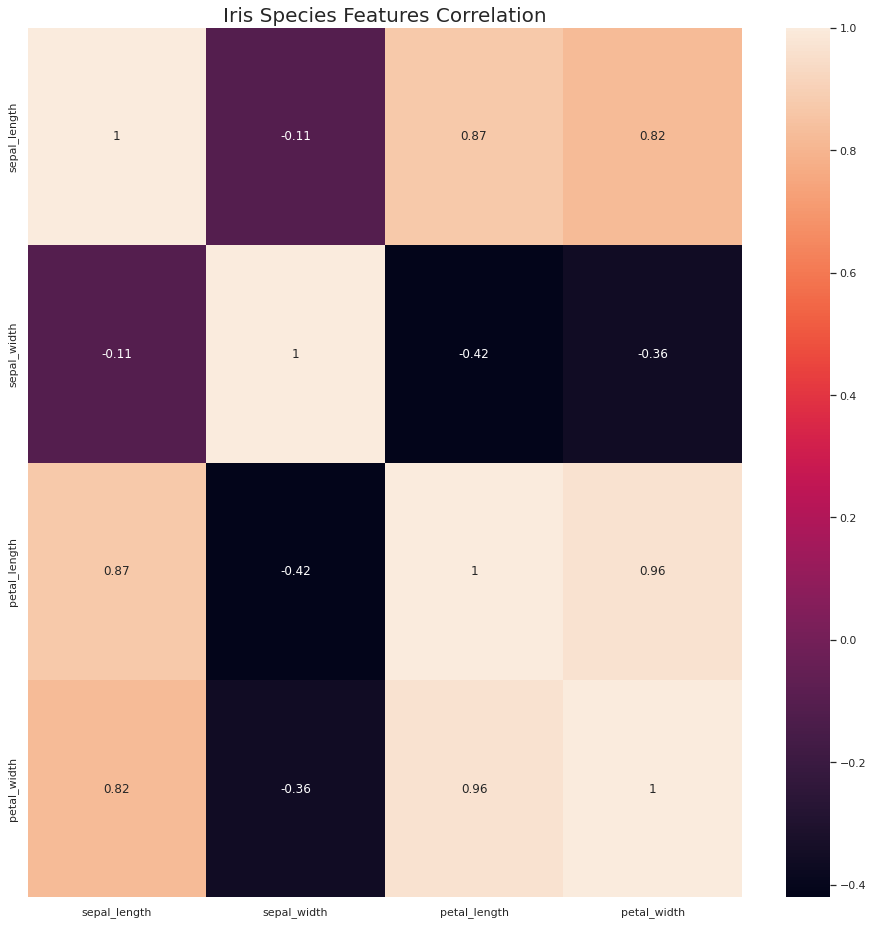

In [12]:
plt.figure(figsize = (16, 16))
sns.heatmap(iris_data.corr(), annot = True)

plt.title("Iris Species Features Correlation", fontsize = 20)

plt.show()

#### Insights:

- Sepal length and width are poorly correlated to each other.

- Petal length and width are highly correlated to one another.

- The correlation of petal length and width to sepal length is also very high.

### Checking Mean & Median Values for Each Species

In [13]:
species_values = iris_data.groupby("iris_class").agg(["mean", "median"]).T

In [14]:
species_values

iris_class           Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length mean          5.006            5.936           6.588
             median        5.000            5.900           6.500
sepal_width  mean          3.418            2.770           2.974
             median        3.400            2.800           3.000
petal_length mean          1.464            4.260           5.552
             median        1.500            4.350           5.550
petal_width  mean          0.244            1.326           2.026
             median        0.200            1.300           2.000

### Plotting the Probability Density Function PDF 

- with each feature as a variable on X-axis and it's histogram and corresponding kernel density plot on Y-axis.

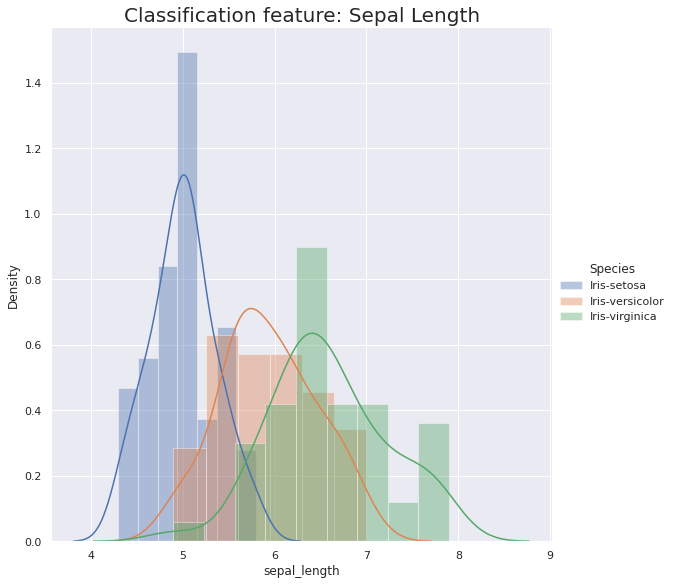

In [15]:
sns.FacetGrid(iris_data, hue = "iris_class", height = 8).map(sns.distplot, "sepal_length").add_legend(title = "Species")
plt.title("Classification feature: Sepal Length", fontsize = 20)
plt.show()

- This plot shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature.

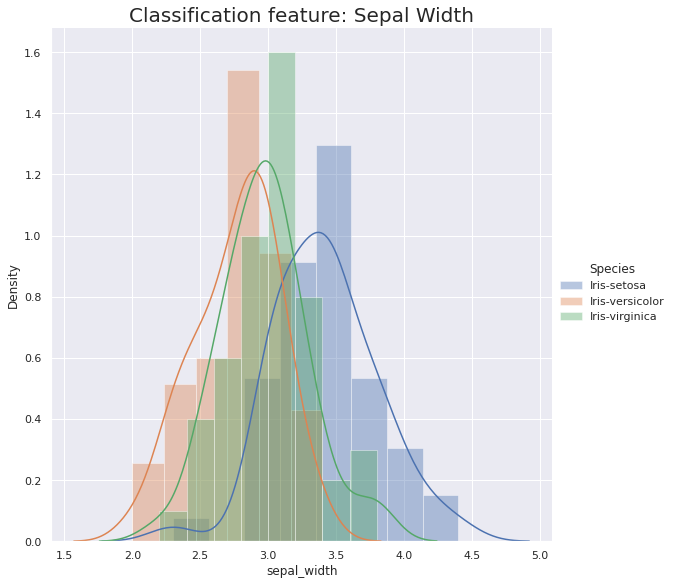

In [16]:
sns.FacetGrid(iris_data, hue = "iris_class", height = 8).map(sns.distplot, "sepal_width").add_legend(title = "Species")
plt.title("Classification feature: Sepal Width", fontsize = 20)
plt.show()

- Here the overlap is even bigger, so we discard it as well.

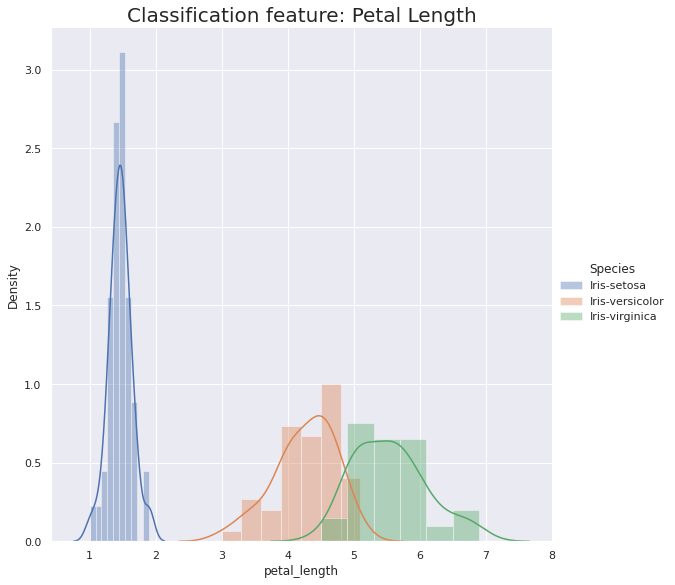

In [17]:
sns.FacetGrid(iris_data, hue = "iris_class", height = 8).map(sns.distplot, "petal_length").add_legend(title = "Species")
plt.title("Classification feature: Petal Length", fontsize = 20)
plt.show()

- This could be a very good classification feature as it clearly separates the species. The overlap is very small (between Versicolor and Virginica), Setosa is well separated from the other two.

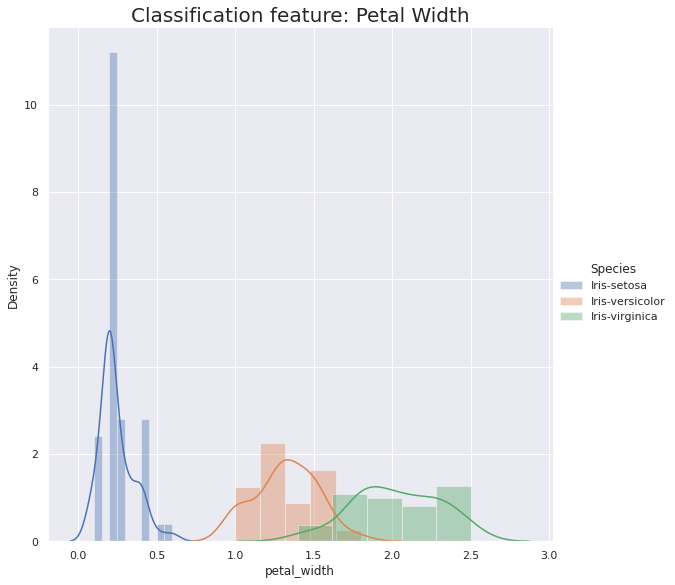

In [18]:
sns.FacetGrid(iris_data, hue = "iris_class", height = 8).map(sns.distplot, "petal_width").add_legend(title = "Species")
plt.title("Classification feature: Petal Width", fontsize = 20)
plt.show()

- Same as the previous plot, this one shows that petal width is also a good classification feature. The overlap between Versicolor and Virginica is is significantly less, and Setosa is well separated from the rest of the two.

We can choose either of the last two to distinguish among the species, but I will explore the 3rd plot at this point.

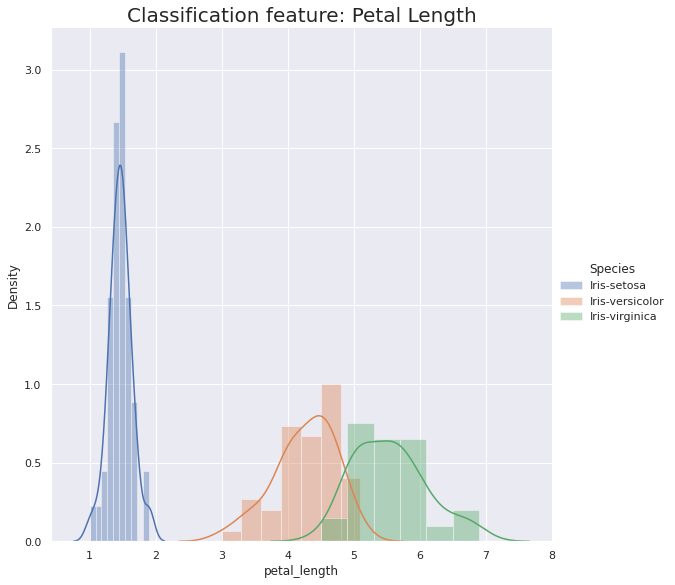

In [19]:
sns.FacetGrid(iris_data, hue = "iris_class", height = 8).map(sns.distplot, "petal_length").add_legend(title = "Species")
plt.title("Classification feature: Petal Length", fontsize = 20)
plt.show()

### Data Insights:

- The PDF curve of Setosa ends roughly at 2.1, so we can say that if petal length < 2.1, then the species is Iris Setosa.

- The point of intersection between PDF curves of Versicolor and Virginica is roughly at 4.8, so let's say that if petal length > 2.1 and < 4.8, then species is Versicolor.

- And last, if petal length > 4.8 then species is Virginica

### Final insight:

- With this, we can firmly say that the answer to our initial question is YES, we can predict classes based on their sizes. Not all of the features will give us a good prediction, but half of them will be quite accurate.

- Based on the small amount of observations, there is of course a possibility that there can be a lot of outliers as well. But this is not certain if we look at this dataset.